# Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
%matplotlib inline

# Taking the datasets as input

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Data Visualization Project/googleplaystore.csv")
data2 = pd.read_csv("/content/drive/MyDrive/Data Visualization Project/googleplaystore_user_reviews.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Taking care of missing values

In [ ]:
data1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data1_1 = data1.dropna()

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Now, the dataset has no missing values

In [ ]:
data1_1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data1_1.describe() #the description is regarding the rating column as it is the only numerical column here

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


# The Dataset has many columns that are not having proper numerical contents and they cannot be worked on directly. We will map them to normal numbers so that we are free to work with them.

# Data Cleaning

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data1_1['Installs'] = data1_1['Installs'].map(lambda x: x.rstrip('+'))

<ipython-input-13-b81741e21d9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Installs'] = data1_1['Installs'].map(lambda x: x.rstrip('+'))


In [ ]:
data1_1['Installs'] = pd.to_numeric(data1_1['Installs'].str.replace(',',''))

<ipython-input-14-72ad1ae10485>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Installs'] = pd.to_numeric(data1_1['Installs'].str.replace(',',''))


In [ ]:
data1_1['Price'] = pd.to_numeric(data1_1['Price'].str.replace('$',''))

<ipython-input-15-303564ef37c2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1_1['Price'] = pd.to_numeric(data1_1['Price'].str.replace('$',''))
<ipython-input-15-303564ef37c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Price'] = pd.to_numeric(data1_1['Price'].str.replace('$',''))


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data1_1.var()

<ipython-input-17-b8e6293d39a7>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1_1.var()


Rating      2.654959e-01
Installs    8.329549e+15
Price       2.503243e+02
dtype: float64

In [ ]:
data1_1['Installs with Log'] = np.log(data1_1["Installs"])

<ipython-input-18-250f173b120b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Installs with Log'] = np.log(data1_1["Installs"])


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925


In [ ]:
data1_1.var() #Now, the variance of Installs column has been normalized

<ipython-input-20-c7cd7bcbe93c>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1_1.var() #Now, the variance of Installs column has been normalized


Rating               2.654959e-01
Installs             8.329549e+15
Price                2.503243e+02
Installs with Log    1.475847e+01
dtype: float64

In [ ]:
data1_1["App"].duplicated().sum()

1170

In [ ]:
data1_1.drop_duplicates(inplace = True)

<ipython-input-22-738895c7e2af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1.drop_duplicates(inplace = True)


In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925


In [ ]:
data1_1.duplicated().sum()

0

In [ ]:
data1_1['Reviews'] = pd.to_numeric(data1_1['Reviews'].str.replace('$',''))

<ipython-input-25-f07ee014e66a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1_1['Reviews'] = pd.to_numeric(data1_1['Reviews'].str.replace('$',''))
<ipython-input-25-f07ee014e66a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1['Reviews'] = pd.to_numeric(data1_1['Reviews'].str.replace('$',''))


In [ ]:
data1_1 = data1_1.loc[data1_1.groupby(['App'])['Reviews'].idxmax()]

In [ ]:
data1_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs with Log
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,13.815511
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,9.210340
4541,.R,TOOLS,4.5,259,203k,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,9.210340
4636,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,9.210340
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100,Free,0.0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,4.605170


# Plotting Starts 👽

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

# What are the top 20 apps in the Google Play Store organised by genre?

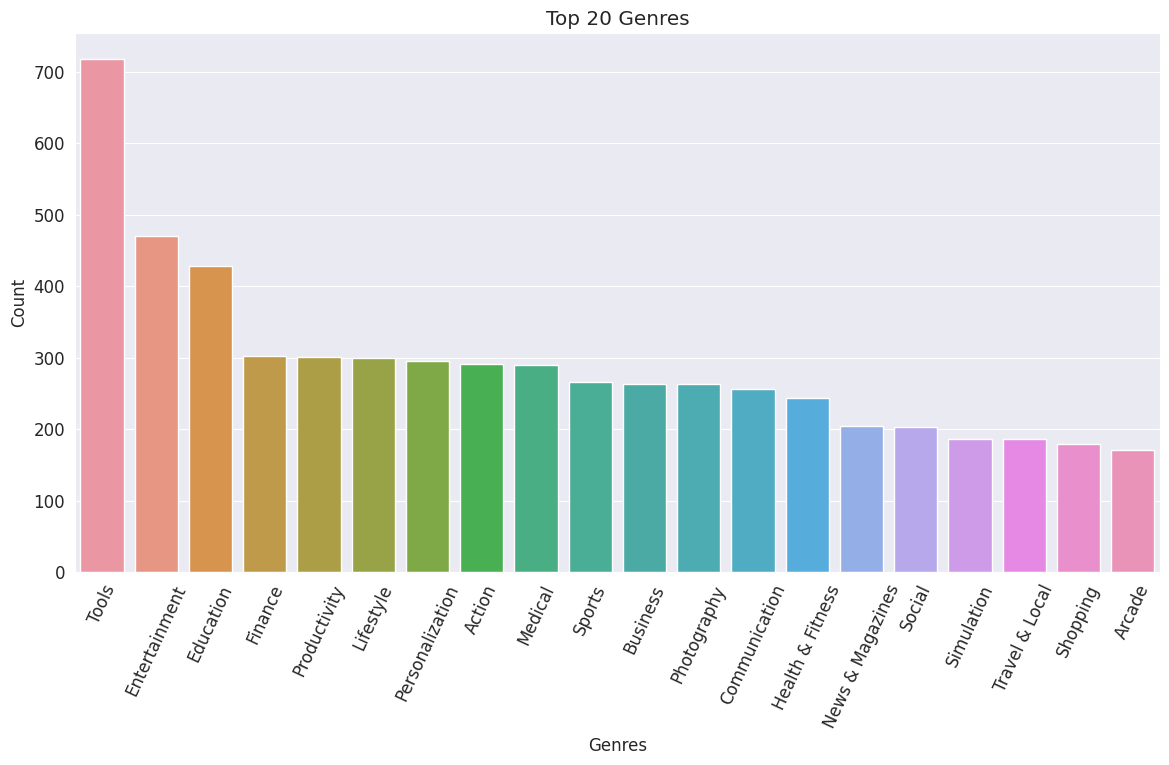

In [ ]:
best_gen = data1_1.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
install_no = data1_1.groupby(['Genres'])[['Installs']].sum()
final_install = pd.merge(best_gen, install_no, on='Genres')
install_20 = final_install.head(20)
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of Application")
plt.title("Top 20 Genres")
sns.barplot(x=install_20.Genres, y=install_20.Count)
plt.show()

# What are the most popular Genres among the top 20 Genres?

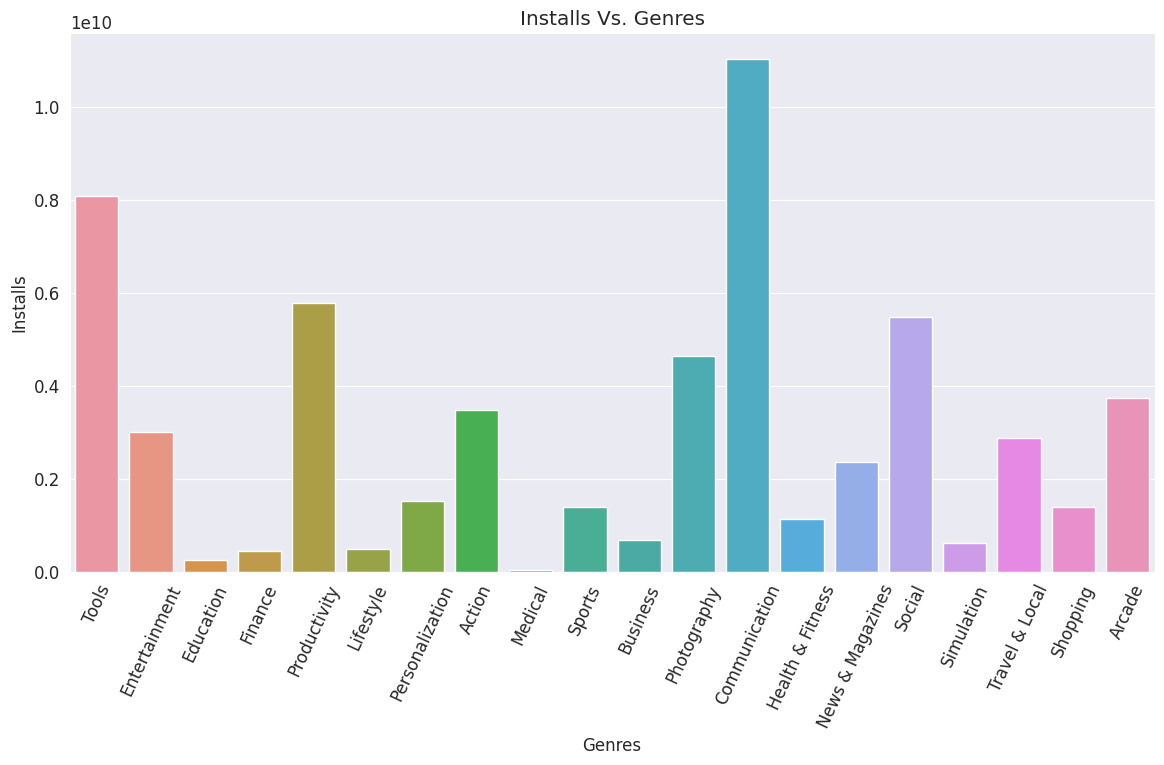

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs Vs. Genres")
sns.barplot(x=install_20.Genres, y=install_20.Installs)
plt.show()

**As the following two graphs demonstrate: Although the majority of apps in the Google Play Store fall under the Tools, Entertainment, and Education categories, the situation is not the same in terms of installation and demand in the market. Communication, Tools, and Productivity are the genres with the most apps installed.**

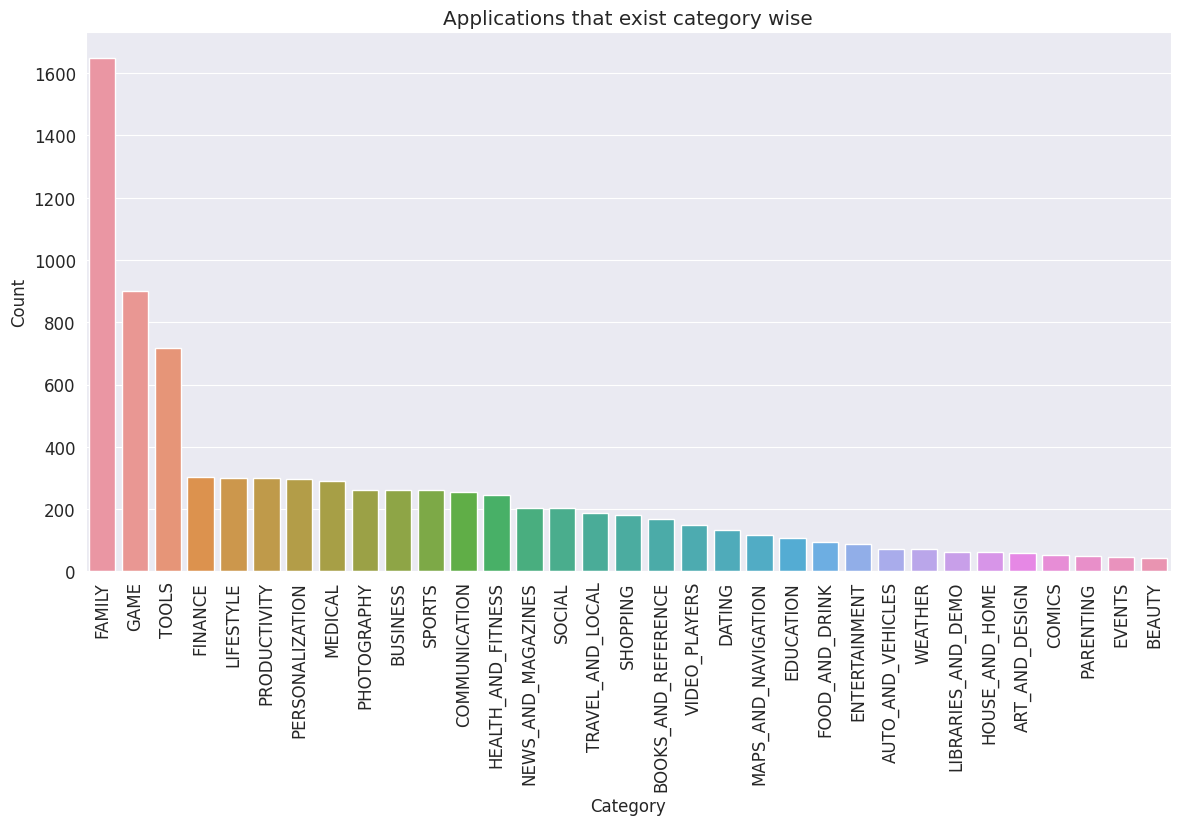

In [ ]:
best_cat = data1_1.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
cat_install = data1_1.groupby(['Category'])[['Installs']].sum()
best_cat_install = pd.merge(best_cat, cat_install, on='Category')
best_20_cat_install = best_cat_install
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Applications that exist category wise")
sns.barplot(x=best_20_cat_install.Category, y=best_20_cat_install.Count)
plt.show()

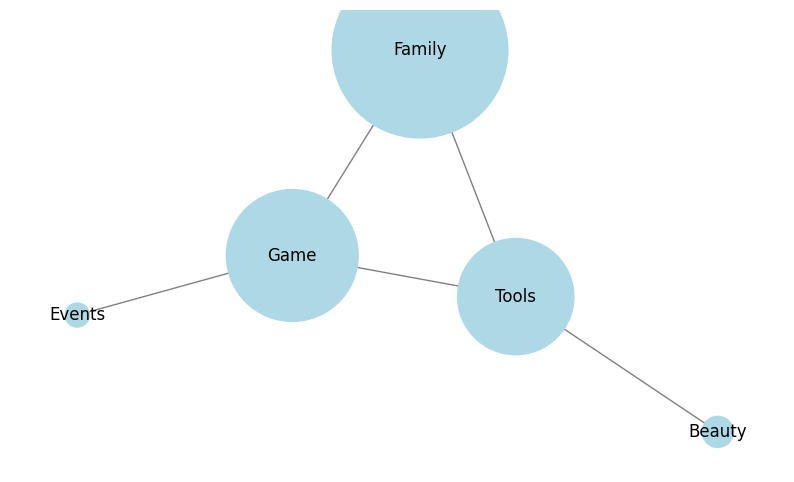

In [ ]:
#The size of each node corresponds to the number of apps in that category, with larger nodes representing more apps.
#The edges represent relationships between categories of apps, with thicker edges indicating stronger relationships.
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node('Family', apps=1600)
G.add_node('Game', apps=900)
G.add_node('Tools', apps=700)
G.add_node('Events', apps=30)
G.add_node('Beauty', apps=50)

G.add_edge('Family', 'Game')
G.add_edge('Family', 'Tools')
G.add_edge('Game', 'Tools')
G.add_edge('Game', 'Events')
G.add_edge('Tools', 'Beauty')

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=[n * 10 for n in nx.get_node_attributes(G, 'apps').values()], node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.axis('off')
plt.show()


<ipython-input-33-0fe5ddaa070d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_20_cat_install = data1_1.groupby('Category').sum().sort_values('Installs', ascending=False).head(20).reset_index()
<ipython-input-33-0fe5ddaa070d>:15: RuntimeWarning: overflow encountered in long_scalars
  sim = (best_20_cat_install.loc[i, 'Installs'] * best_20_cat_install.loc[j, 'Installs']) / (data1_1[data1_1['Category']==cat1]['Installs'].sum() * data1_1[data1_1['Category']==cat2]['Installs'].sum())


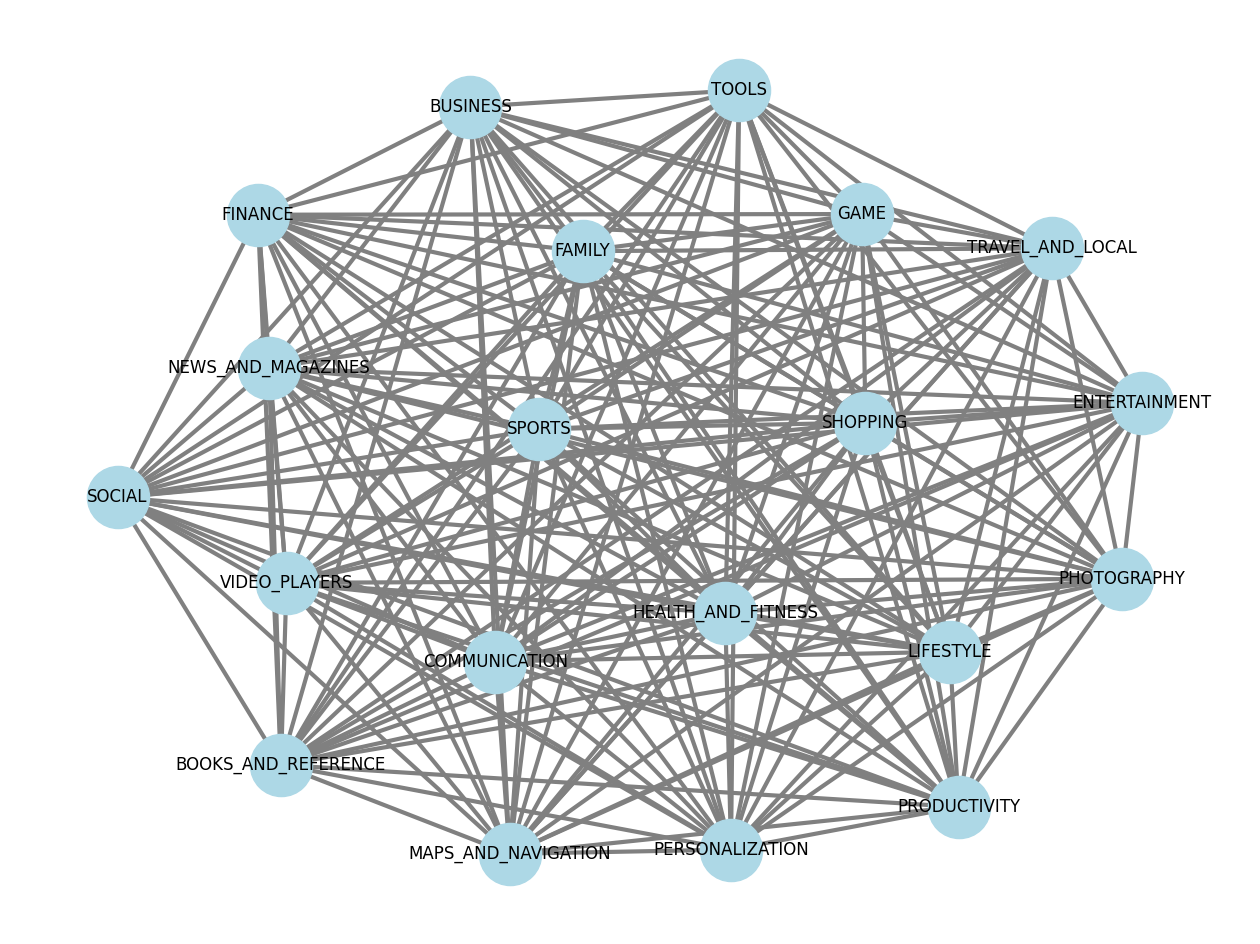

In [ ]:
#creates a graph that shows the similarity between the top 20 app categories in terms of their total number of installs.
best_20_cat_install = data1_1.groupby('Category').sum().sort_values('Installs', ascending=False).head(20).reset_index()

# Create a new empty graph
G = nx.Graph()

# Add a node for each category in the DataFrame
for cat in best_20_cat_install['Category']:
    G.add_node(cat)

# Add edges between nodes based on similarity between categories
for i, cat1 in enumerate(best_20_cat_install['Category']):
    for j, cat2 in enumerate(best_20_cat_install['Category']):
        if i < j:
            sim = (best_20_cat_install.loc[i, 'Installs'] * best_20_cat_install.loc[j, 'Installs']) / (data1_1[data1_1['Category']==cat1]['Installs'].sum() * data1_1[data1_1['Category']==cat2]['Installs'].sum())
            if sim > 0.4:
                G.add_edge(cat1, cat2, weight=sim)

# Draw the graph
fig, ax = plt.subplots(figsize=(16, 12))
pos = nx.spring_layout(G, k=0.2)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12)
edges = G.edges()
weights = [G[u][v]['weight']*3 for u,v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='gray')
plt.axis('off')
plt.show()

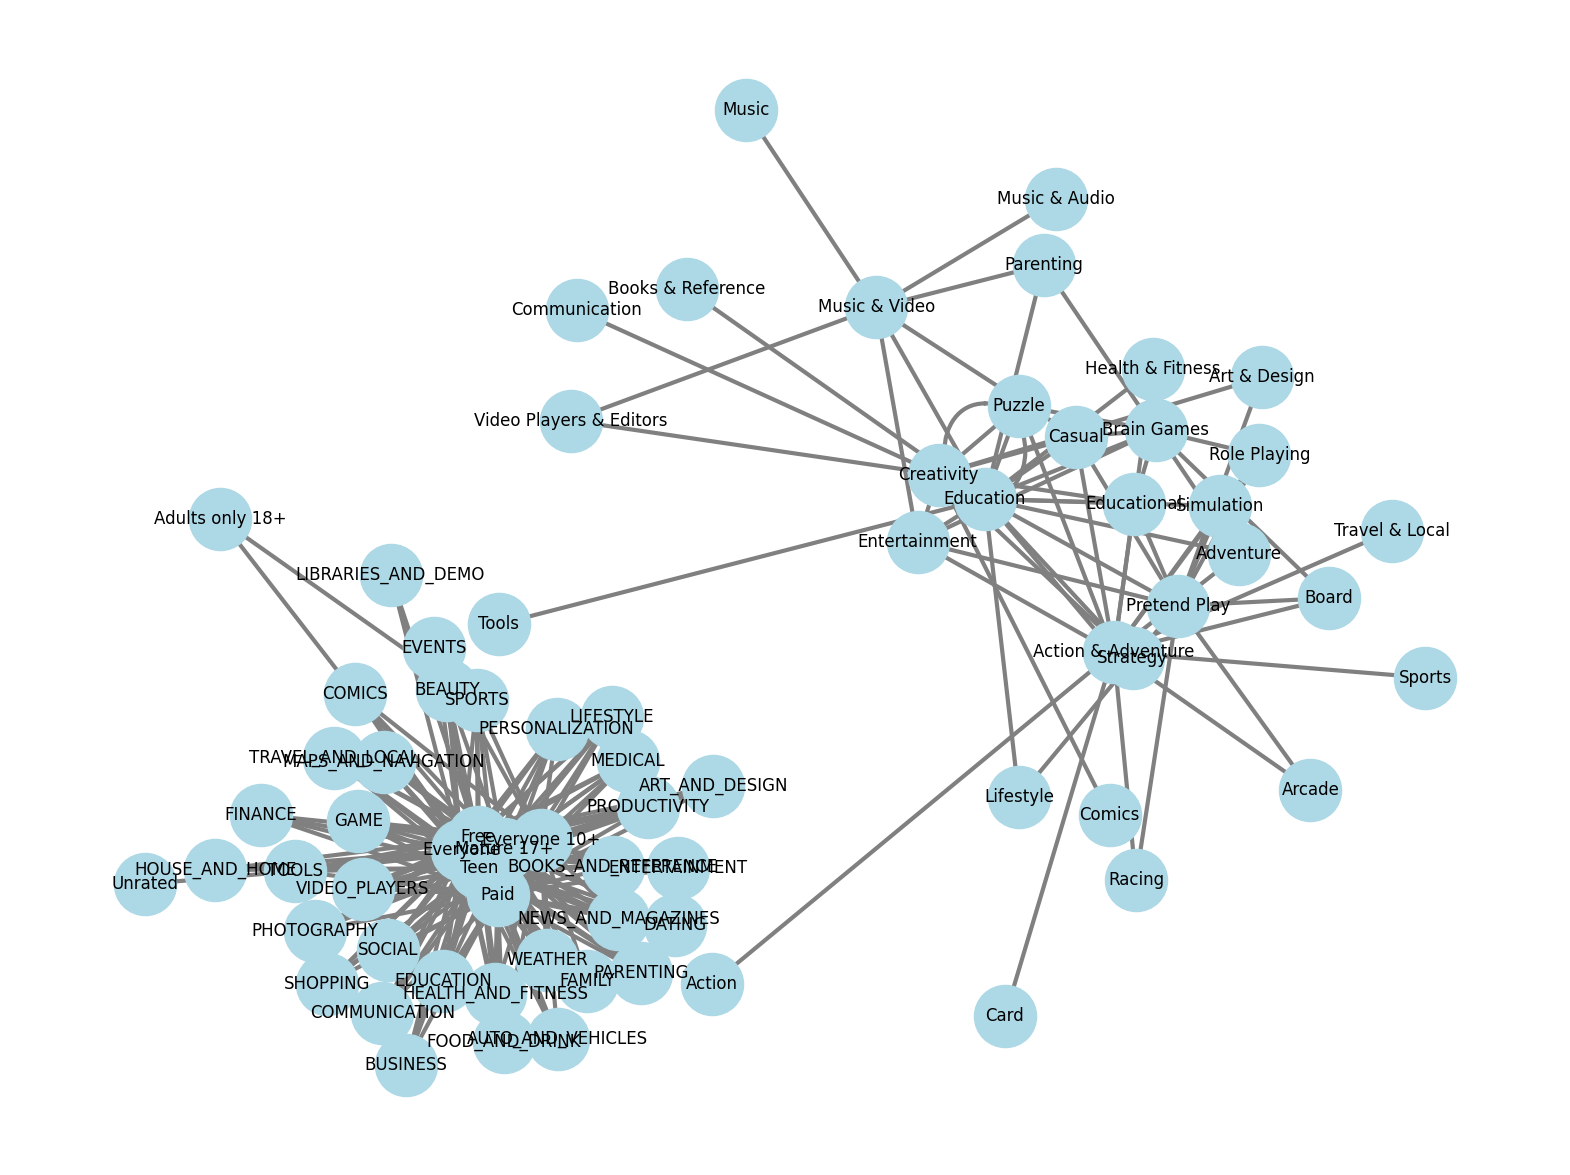

In [ ]:
G = nx.Graph()
#in app purchases
# Add a node for each category in the DataFrame
for category in data1_1['Category'].unique():
    G.add_node(category)
#his code creates a networkx graph to visualize relationships between categories, genres, content ratings,
#types (paid or free), and price ranges of apps in the Google Play Store
# Add edges between nodes based on relationships between columns
for idx, row in data1_1.iterrows():
    # Add edges between nodes with the same genre
    if row['Genres'] != 'NaN':
        genres = row['Genres'].split(';')
        for i in range(len(genres)):
            for j in range(i+1, len(genres)):
                G.add_edge(genres[i], genres[j], weight=1)
    # Add edges between nodes with the same content rating
    if row['Content Rating'] != 'NaN':
        G.add_edge(row['Category'], row['Content Rating'], weight=1)
    # Add edges between nodes with the same type and price range
    if row['Type'] == 'Paid' and row['Price'] > 0:
        G.add_edge(row['Category'], 'Paid', weight=1)
    elif row['Type'] == 'Free':
        G.add_edge(row['Category'], 'Free', weight=1)

# Draw the graph
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12)
edges = G.edges()
weights = [G[u][v]['weight']*3 for u,v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='gray')
plt.axis('off')
plt.show()

visualize relationships between different categories, genres, content ratings, types (paid or free), and price ranges of apps in the Google Play Store.

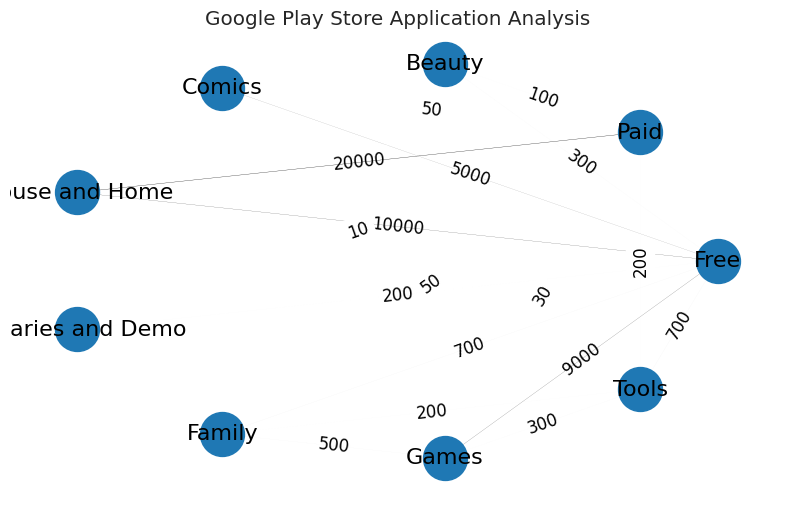

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(['Free', 'Paid', 'Beauty', 'Comics', 'House and Home', 'Libraries and Demo'])

# Add edges
G.add_edges_from([('Free', 'Beauty', {'weight': 300}),
                  ('Free', 'Comics', {'weight': 5000}),
                  ('Free', 'House and Home', {'weight': 10000}),
                  ('Free', 'Libraries and Demo', {'weight': 200}),
                  ('Paid', 'Beauty', {'weight': 100}),
                  ('Paid', 'Comics', {'weight': 50}),
                  ('Paid', 'House and Home', {'weight': 20000}),
                  ('Paid', 'Libraries and Demo', {'weight': 10})])

# Add remaining edges
G.add_edges_from([('Free', 'Family', {'weight': 700}),
                  ('Free', 'Games', {'weight': 9000}),
                  ('Free', 'Tools', {'weight': 700}),
                  ('Paid', 'Family', {'weight': 50}),
                  ('Paid', 'Games', {'weight': 30}),
                  ('Paid', 'Tools', {'weight': 200}),
                  ('Family', 'Games', {'weight': 500}),
                  ('Family', 'Tools', {'weight': 200}),
                  ('Games', 'Tools', {'weight': 300}),
                 ])



# Draw graph
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=16)
for u, v, d in G.edges(data=True):
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight']}, font_size=12)
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']/100000)

# Set axis and title
plt.axis('off')
plt.title('Google Play Store Application Analysis')

# Show graph
plt.show()
